In [1]:
# Import necessary libraries
%pip install bioinfokit
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=00fecf56289e7940b9a576da735dfbaaa32d121dfb423dc9a9f2a5f25053906a
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


# Data loading

In [2]:
# Upload the dataset
uploaded = files.upload()
data_path = next(iter(uploaded))

# Load the dataset
data = pd.read_excel(data_path, sheet_name='ChildCareCentres')

Saving INF2178_A2_data.xlsx to INF2178_A2_data.xlsx


# Data preparation

Basic information of the dataset

In [3]:
# Examine the Dataset
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)

Dataset Shape: (1063, 17)

Data Types:
 _id             int64
LOC_ID          int64
LOC_NAME       object
AUSPICE        object
ADDRESS        object
PCODE          object
ward            int64
bldg_type      object
BLDGNAME       object
IGSPACE         int64
TGSPACE         int64
PGSPACE         int64
KGSPACE         int64
SGSPACE         int64
TOTSPACE        int64
subsidy        object
cwelcc_flag    object
dtype: object


Drop and clean missing variable(if appliable)

In [4]:
# Dropping unnecessary variables
data = data.drop(['_id', 'LOC_ID', 'LOC_NAME', 'ADDRESS', 'PCODE', 'BLDGNAME', 'bldg_type'], axis=1)

In [5]:
# Missing value
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 AUSPICE        0
ward           0
IGSPACE        0
TGSPACE        0
PGSPACE        0
KGSPACE        0
SGSPACE        0
TOTSPACE       0
subsidy        0
cwelcc_flag    0
dtype: int64


In [6]:
# Preliminary Exploratory Data Analysis (EDA)
print(data.describe())
data[['AUSPICE', 'subsidy', 'cwelcc_flag']].describe(include='all')

              ward      IGSPACE      TGSPACE      PGSPACE      KGSPACE  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean     12.511759     3.896519    11.600188    24.258702    14.257761   
std       7.032050     6.091782    12.088152    18.577416    20.493290   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     0.000000     0.000000    16.000000     0.000000   
50%      12.000000     0.000000    10.000000    24.000000     0.000000   
75%      19.000000    10.000000    15.000000    32.000000    26.000000   
max      25.000000    30.000000    90.000000   144.000000   130.000000   

           SGSPACE     TOTSPACE  
count  1063.000000  1063.000000  
mean     21.661336    75.674506  
std      30.423503    47.816518  
min       0.000000     6.000000  
25%       0.000000    43.000000  
50%       0.000000    62.000000  
75%      30.000000    97.000000  
max     285.000000   402.000000  


,AUSPICE,subsidy,cwelcc_flag
count,1063,1063,1063
unique,3,2,2
top,Non Profit Agency,Y,Y
freq,703,718,926


# Examine Interested columns

In [7]:
# ONLY keep useful variables
df = data

The goal of this section, which is to uncover patterns, trends, and disparities within the childcare system that can inform policy, resource allocation, and program development in terms of auspice.

key features: TOTSPACE, AUSPICE, SUBSIDY

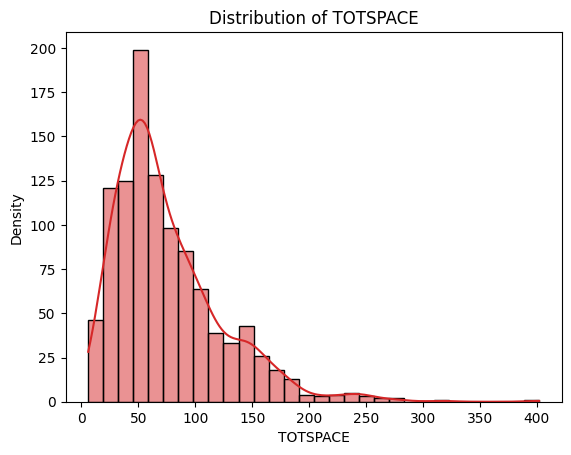

In [8]:
# Plot for TOTSPACE
sns.histplot(df['TOTSPACE'], bins=30, kde=True, color='tab:red')
plt.title('Distribution of TOTSPACE')
plt.xlabel('TOTSPACE')
plt.ylabel('Density')
plt.show()

Total space's skewness is towards left.The common density is around 50.

<ipython-input-9-87931a146a3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="coolwarm")


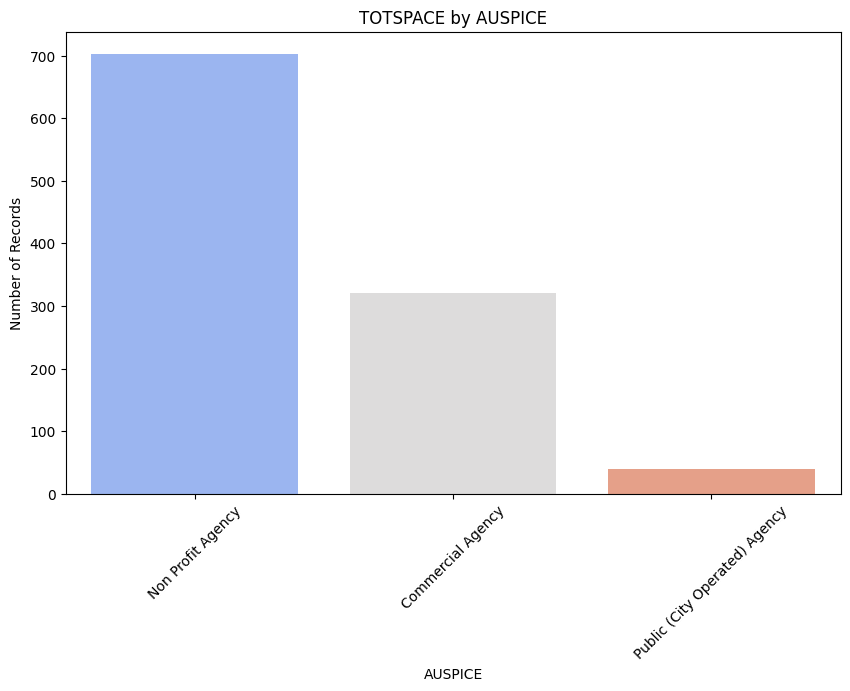

In [9]:
# Plot for total space by auspice
plt.figure(figsize=(10, 6))
sector_counts = df['AUSPICE'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="coolwarm")
plt.title('TOTSPACE by AUSPICE')
plt.xlabel('AUSPICE')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

The record of total space is not even across auspice, indicating variability.

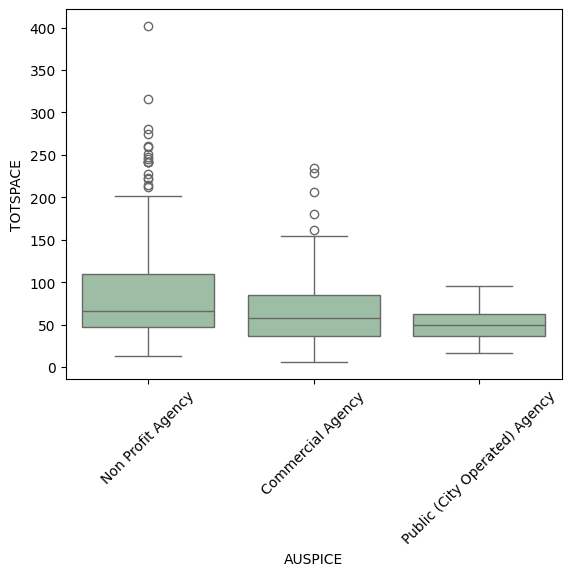

In [10]:
# Visualize the data distribution by AUSPICE, showing only outliers as dots
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()

<ipython-input-11-009953510aad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis")


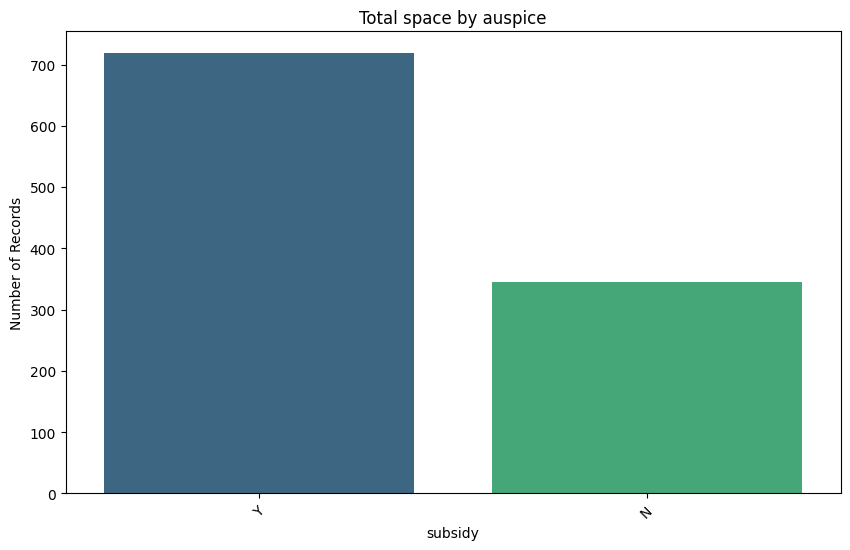

In [11]:
# Plot for total space by auspice
plt.figure(figsize=(10, 6))
sector_counts = df['subsidy'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis")
plt.title('Total space by auspice')
plt.xlabel('subsidy')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.show()

The record of total space is not even across subsidy, indicating variability.

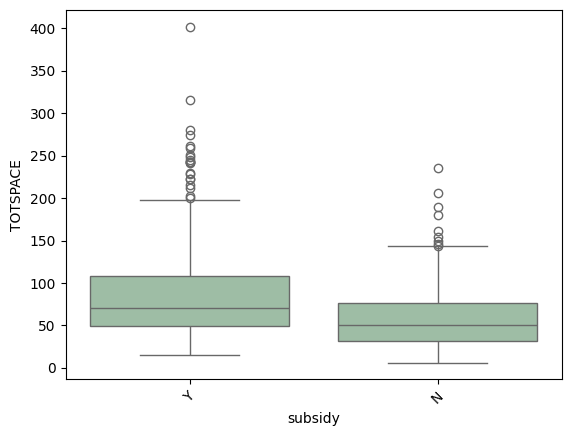

In [12]:
# Visualize the data distribution by subsidy, showing only outliers as dots
ax = sns.boxplot(x='subsidy', y='TOTSPACE', data=df, color='#99c2a2')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.show()

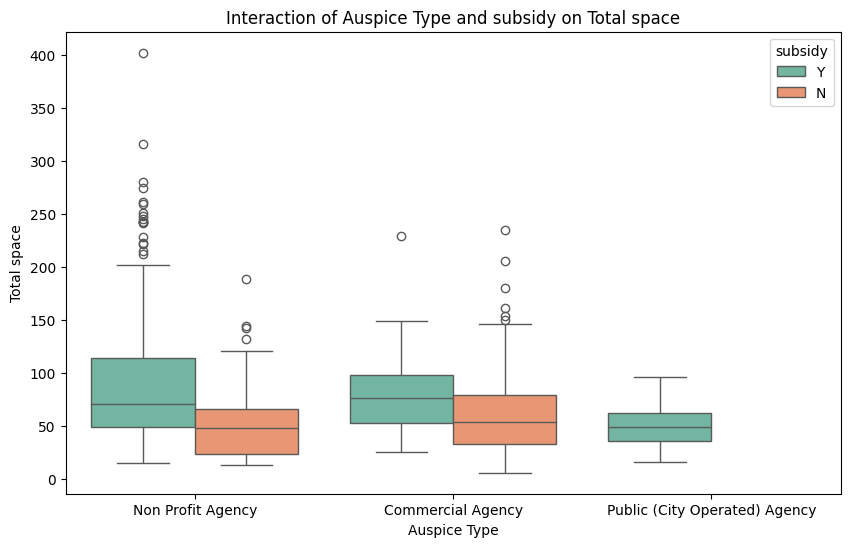

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, palette='Set2')
plt.title('Interaction of Auspice Type and subsidy on Total space')
plt.xlabel('Auspice Type')
plt.ylabel('Total space')
plt.legend(title='subsidy')

plt.show()

The central tendency is about the same between receiving subsidy group and no-subsidy group.\
 The receiving subsidy group has a larger variability than no-subsidy group.

# One-way ANOVA(AUSPICE & TOTSPACE)

In [14]:
# Perform one-way ANOVA using OLS
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,5.057716e-10
Residual,2.332065e+06,1060.0,NaN,NaN


Given that the p-value is less than 0.001, far below the commonly accepted significance level of 0.05, we decisively reject the null hypothesis. This outcome suggests the presence of statistically significant disparities in the average values among one or more categories of childcare centres. Consequently, it becomes necessary to conduct post-hoc analyses to delineate the specific differences among individual pairings.

In [15]:
# Post-hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


The post-hoc test results indicate statistically significant differences in the average TOTSPACE between Non Profit Agency and both Commercial Agency and Public (City Operated) Agency. However, the difference between Commercial Agency and Public (City Operated) Agency was not statistically significant at the 0.05 level, suggesting that any observed difference in their mean TOTSPACE could be due to chance.

Visualization of residuals

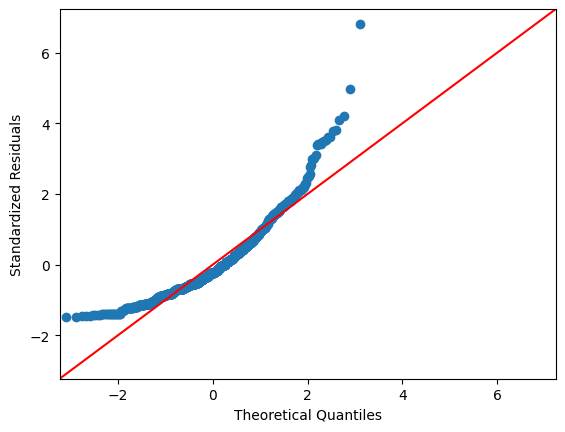

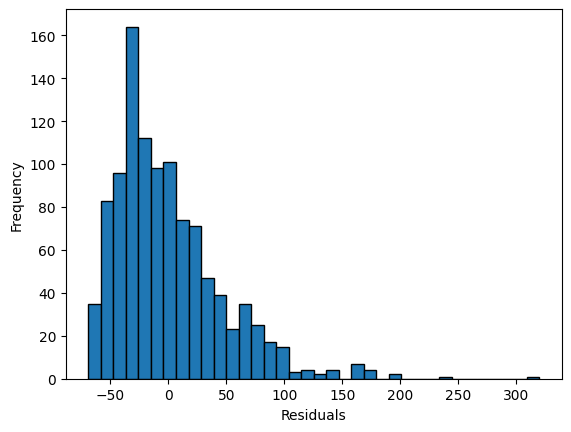

In [16]:
# Generate the Q-Q plot using standardized residuals
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram of residuals
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Check model diagnostics and assumptions

In [17]:
# Normality of Residuals with Shapiro-Wilk test
w, pvalue = stats.shapiro(model.resid)
print("Shapiro-Wilk Test: W =", w, "p-value =", pvalue)

Shapiro-Wilk Test: W = 0.901775598526001 p-value = 1.4964898448030214e-25


The Shapiro-Wilk test yields a p-value below 0.001, falling beneath the commonly accepted threshold of 0.05 for significance. This outcome, together with the Q-Q plot and histogram visualizations presented earlier, strongly suggests a deviation from the assumption of normality. Such a deviation implies that the results of the ANOVA analysis might not be entirely reliable. Nonetheless, it is still feasible to proceed with the ANOVA and conduct Levene's test to evaluate the assumption of homogeneity of variances, given the ANOVA model's inherent robustness to certain violations of assumptions.

In [18]:
# Homogeneity of Variances with Levene's test
grouped_data = df.groupby('AUSPICE')['TOTSPACE'].apply(list)
w, pvalue = stats.levene(*grouped_data)
print("Levene’s Test: W =", w, "p-value =", pvalue)

Levene’s Test: W = 17.927068524236084 p-value = 2.2036889276494363e-08



The result of Levene's test, with a test statistic (W) of 17.927 and a p-value < 0.001
 , suggests a significant finding regarding the homogeneity of variances across the groups being compared. Specifically, the very small p-value, much lower than the conventional significance level of 0.05, indicates strong evidence against the null hypothesis of Levene’s test, which posits that all groups have equal variances.

# Two-way ANOVA(AUSPICE, subsidy & TOTSPACE)

In [19]:
# Conducting a two-way ANOVA on TOTSPACE by AUSPICE and subsidy
model2 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE) * C(subsidy)', data=df).fit()
anova_results2 = sm.stats.anova_lm(model2, typ=2)
anova_results2

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


The results indicate that while AUSPICE alone does not significantly affect the dependent variable, both subsidy and the interaction between AUSPICE and subsidy have significant effects. This suggests that the impact of subsidy on the dependent variable varies depending on the AUSPICE category, and vice versa. The significant p-value in Levene’s test also suggests you need to interpret these ANOVA results with caution due to the violated assumption of homogeneity of variances.

In [20]:
res2 = stat()
res2.anova_stat(df=df, res_var='value', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE) * C(subsidy)')
res2.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


The significant p-value for C(subsidy) and the interaction C(AUSPICE):C(subsidy) indicate that both the subsidy status and its interaction with AUSPICE significantly affect the dependent variable.
The non-significant p-value for C(AUSPICE) suggests that, on its own, AUSPICE does not significantly affect the dependent variable, independent of subsidy.
The significant interaction effect suggests that the impact of subsidy on the dependent variable varies depending on the AUSPICE category.
Violation of the homogeneity of variances assumption (as indicated by Levene's test) suggests caution in interpreting the ANOVA results, although ANOVA is robust to this assumption under certain conditions.

visualization of residuals

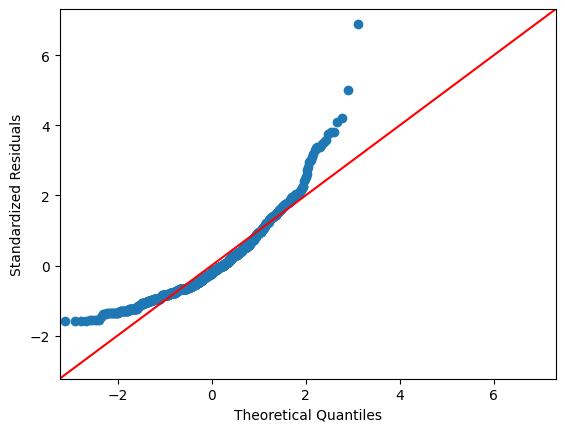

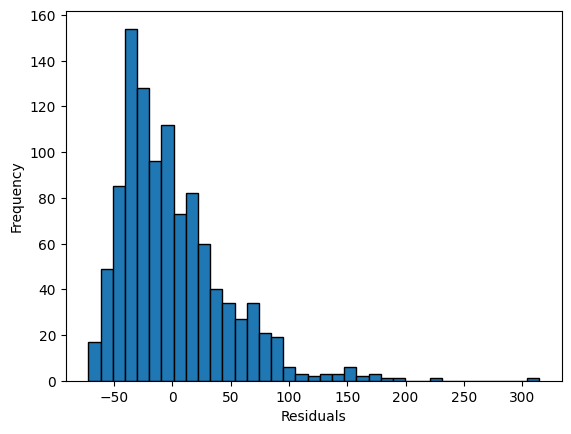

In [21]:
# Generate the Q-Q plot using standardized residuals
sm.qqplot(res2.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram of residuals
plt.hist(res2.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

Interaction plot and assumption tests

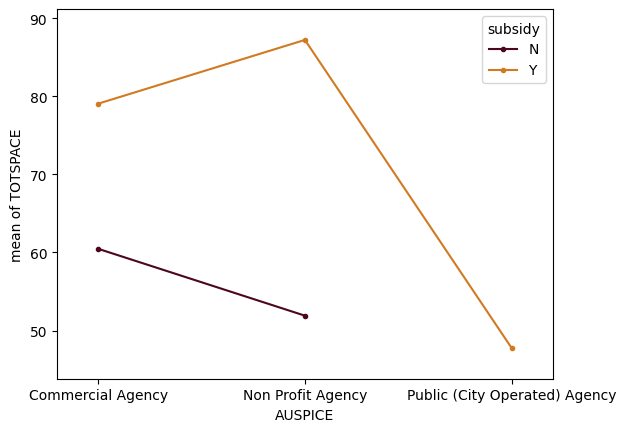

In [22]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['AUSPICE'],trace=df['subsidy'],response=df['TOTSPACE'],colors=['#4c061d','#d17a22'])
plt.show()

In [23]:
# Normality of Residuals with Shapiro-Wilk test
w, pvalue = stats.shapiro(model2.resid)
print("Shapiro-Wilk Test: W =", w, "p-value =", pvalue)

Shapiro-Wilk Test: W = 0.9018619656562805 p-value = 1.5311055543621852e-25


In [24]:
# Homogeneity of Variances with Levene's test
grouped_data = df.groupby(['AUSPICE', 'subsidy'])['TOTSPACE'].apply(list)
w, pvalue = stats.levene(*grouped_data)
print("Levene’s Test: W =", w, "p-value =", pvalue)

Levene’s Test: W = 12.984714966192847 p-value = 2.51515889994611e-10


both assumption test have an extreme small p-value, indicating violations of normality and homogeneity

In [25]:
res2.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'],anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res2.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.377488,49.277825,10.224542,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.512442,23.843471,2.102822,0.650278
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861524,36.667669,10.911871,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.934574,60.986199,7.401338,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",27.162142,7.567922,46.756362,5.596861,0.001135
6,"(Non Profit Agency, N)","(Commercial Agency, N)",8.563060,-6.805934,23.932054,2.249531,0.590448
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.132730,-20.392680,28.658140,0.680345,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",18.599082,1.646292,35.551872,4.429542,0.021963


Significance and Interaction: The results highlight significant differences not just between types of agencies but also how the presence or absence of subsidy impacts TOTSPACE. The interaction between AUSPICE and subsidy significantly affects the outcome, as seen in the more detailed breakdown in the second set of results.
Statistical Significance: Where p-values are below 0.05, differences are considered statistically significant. A p-value of 0.001 or lower is often denoted as < 0.001 to indicate it's very small.